In [1]:
import scanpy as sc
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
basepath = '/stanley/WangLab/kamal/code/remote_notebooks/spin_tests/figures/'
dpi = 300

In [3]:
adata = sc.read_h5ad('/stanley/WangLab/kamal/data/spin_tests/single.h5ad')
adata

AnnData object with n_obs × n_vars = 37928 × 1022
    obs: 'orginindex', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'name', 'mouseID', 'batch', 'cell_center_1', 'cell_center_2', 'cell_center_3', 'CellLabel_rank4', 'x', 'y', 'segment'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'CellLabel_rank4_colors', 'hvg', 'leiden', 'neighbors', 'pca', 'segment', 'umap'
    obsm: 'X_nbr_pca', 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'segment_connectivities', 'segment_distances'

In [4]:
# Get nbrs
def get_nbrs(adata, n_nbrs, spatial_key):
    coordinates = adata.obsm[spatial_key]
    nbrs = NearestNeighbors(n_neighbors=n_nbrs)
    nbrs.fit(coordinates)
    _, nbr_idxs = nbrs.kneighbors(coordinates)
    adata.obsm['nbr_idxs'] = nbr_idxs
    adata.uns['n_nbrs'] = n_nbrs
    adata.uns['spatial_key'] = spatial_key

# Smooth
def smooth(adata):
    X_smooth = []
    for nth_nbrs in np.array(adata.obsm['nbr_idxs']).T:
        X_smooth.append(adata.X[nth_nbrs])
    adata.obsm['smooth'] = np.hstack(X_smooth)

# PCA on smooth features
def pca(adata, pca_key='X_pca', n_pcs=50, svd_solver='randomized', random_state=0):
    pca = PCA(n_components=n_pcs, svd_solver=svd_solver, random_state=random_state)
    adata.obsm[pca_key] = pca.fit_transform(adata.obsm['smooth'])
    # adata.varm[pca_key] = pca.components_.T

In [5]:
n_nbrs = 30
get_nbrs(adata, n_nbrs, 'spatial')

In [6]:
for i in tqdm(range(len(adata))):
    np.random.shuffle(adata.obsm['nbr_idxs'][i])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37928/37928 [00:00<00:00, 275370.54it/s]


In [7]:
smooth(adata)
pca(adata)

In [8]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution=0.5)
sc.tl.umap(adata)

In [17]:
adata.obs['leiden']

index
359677    8
359681    8
359682    8
359683    8
359684    8
         ..
404552    3
404553    3
404555    3
404557    3
404558    3
Name: leiden, Length: 37928, dtype: category
Categories (22, object): ['0', '1', '2', '3', ..., '18', '19', '20', '21']

In [22]:
sc.tl.leiden(adata, resolution=0.65)

In [23]:
adata.obs['leiden']

index
359677    11
359681    11
359682    11
359683    11
359684    11
          ..
404552     1
404553     1
404555     1
404557     1
404558     1
Name: leiden, Length: 37928, dtype: category
Categories (23, object): ['0', '1', '2', '3', ..., '19', '20', '21', '22']

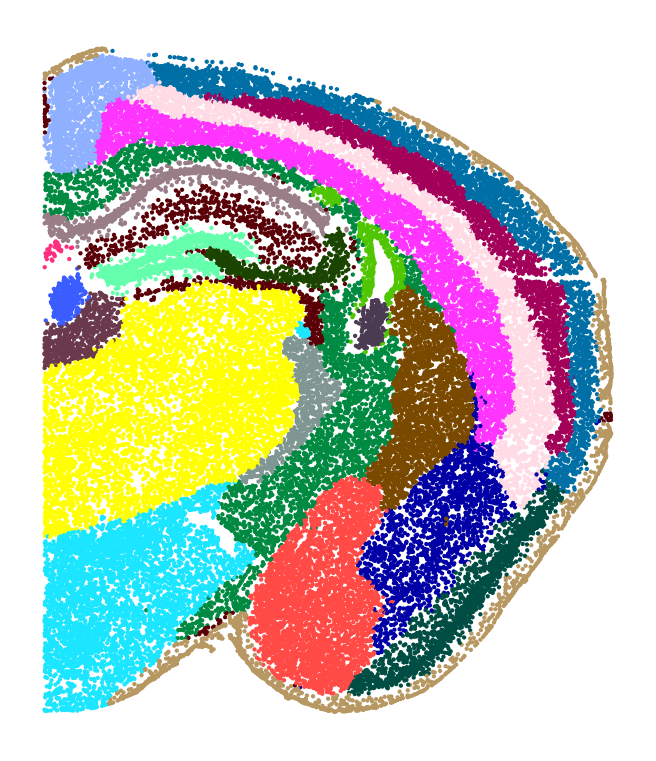

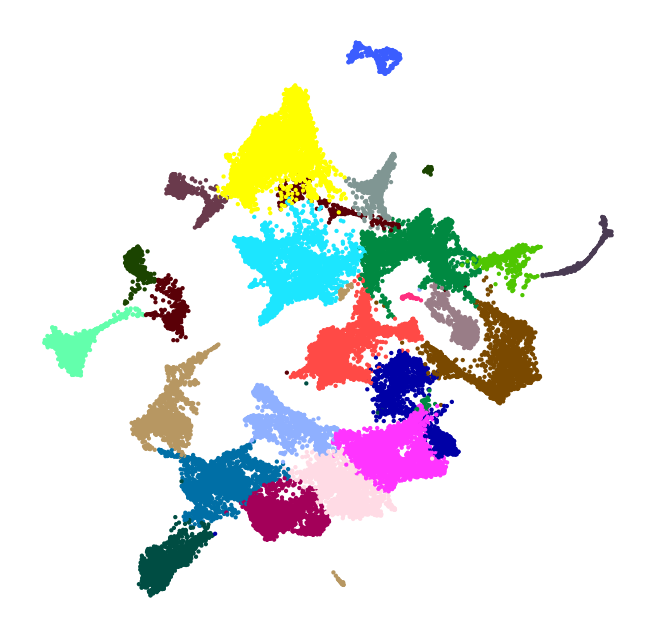

In [24]:
sc.set_figure_params(figsize=(5,6))
sc.pl.embedding(adata, basis='spatial', color='leiden', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'tissue_concat_shuffled_leiden.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap', color='leiden', s=15, palette=sc.pl.palettes.default_102, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'umap_concat_shuffled_leiden.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

# Recolor

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


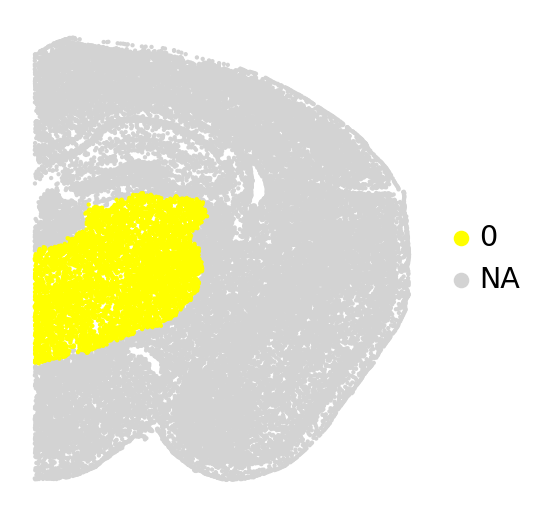

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


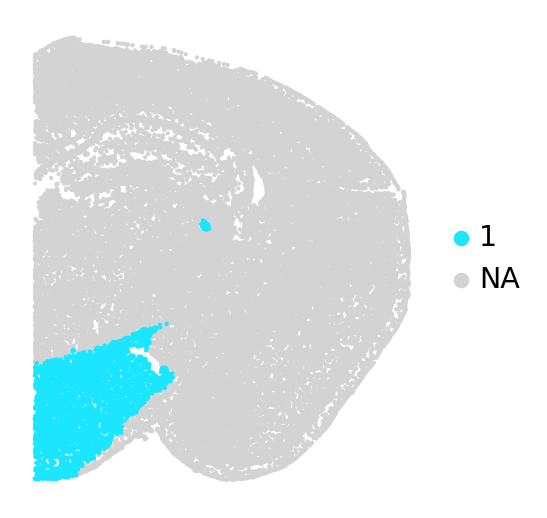

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


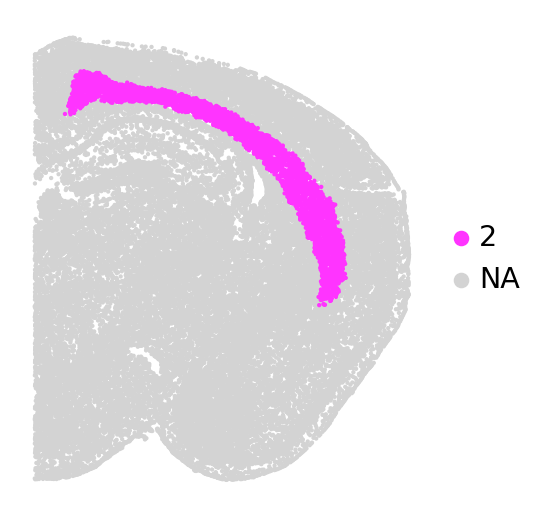

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


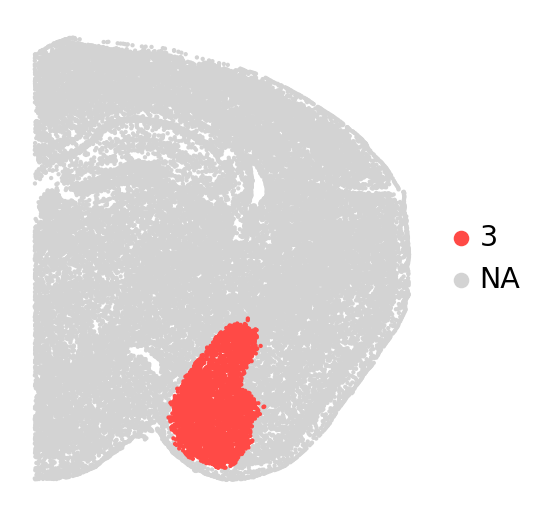

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


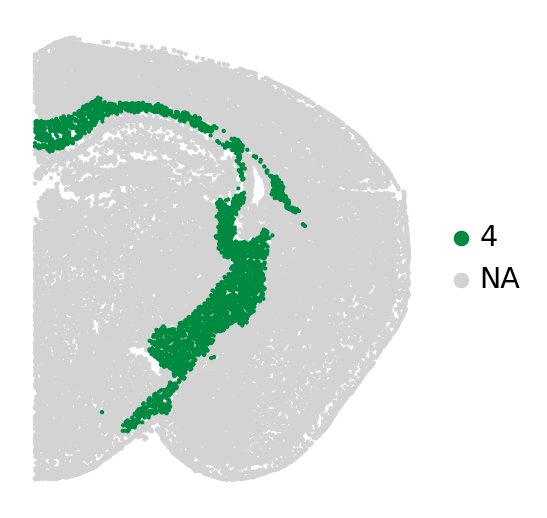

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


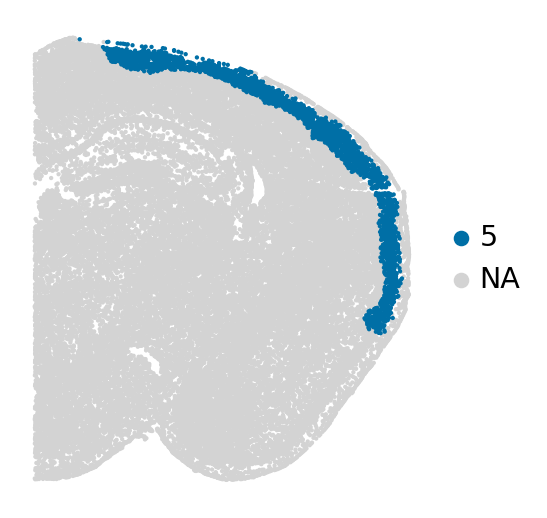

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


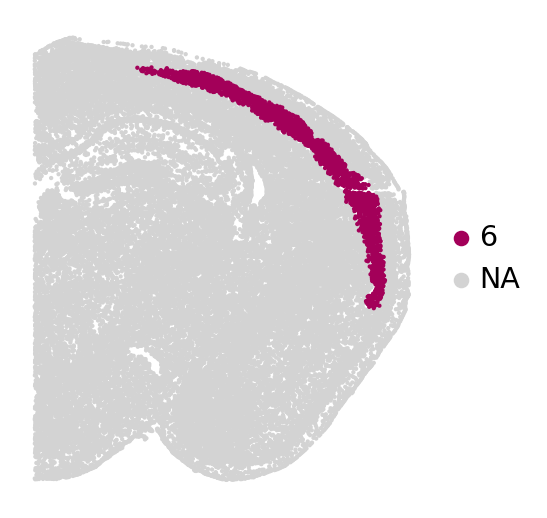

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


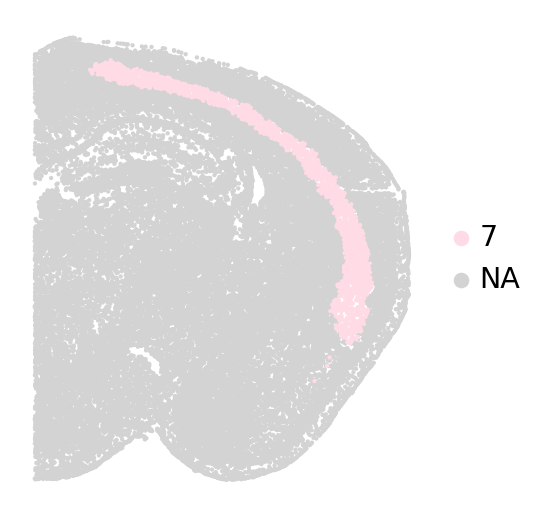

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


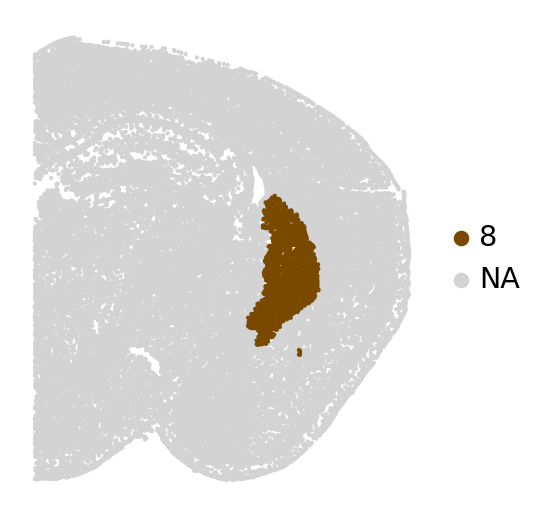

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


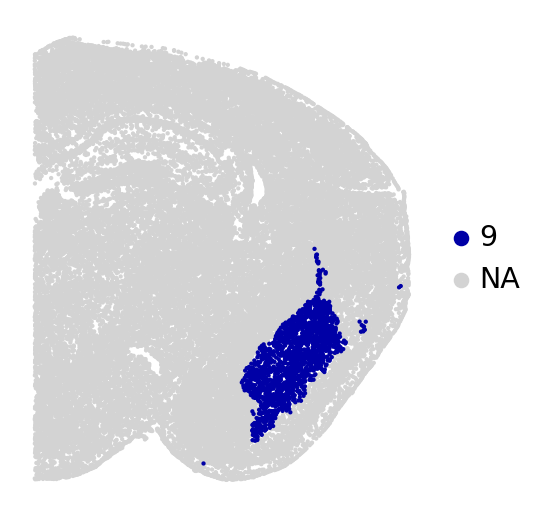

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


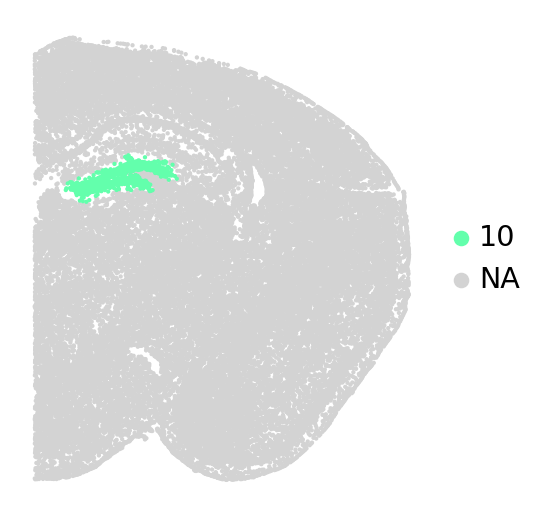

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


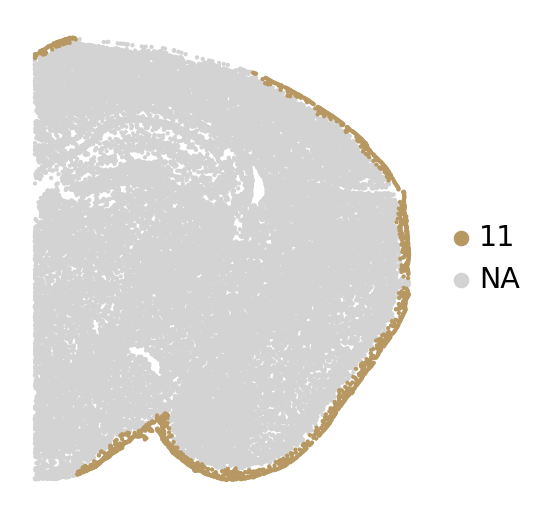

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


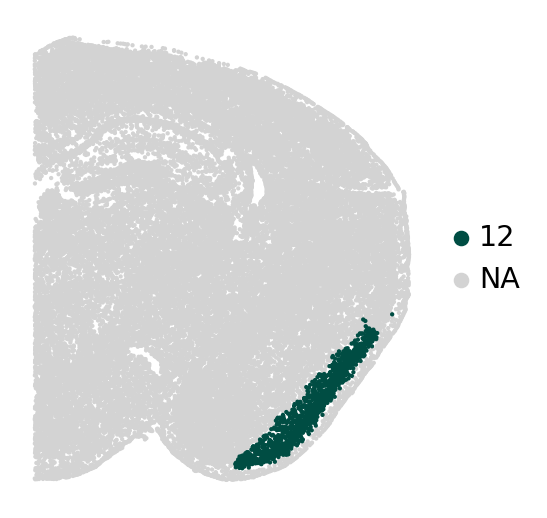

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


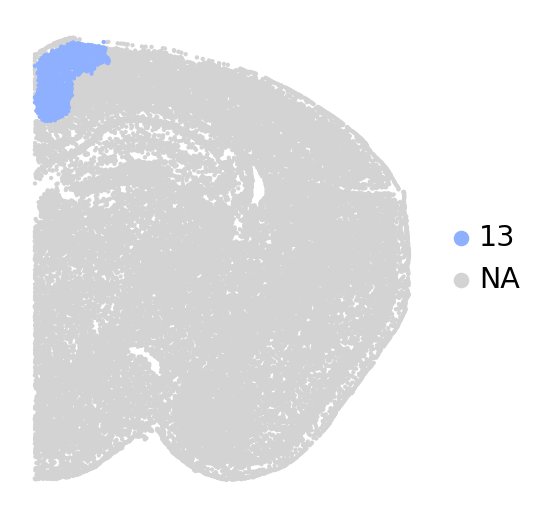

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


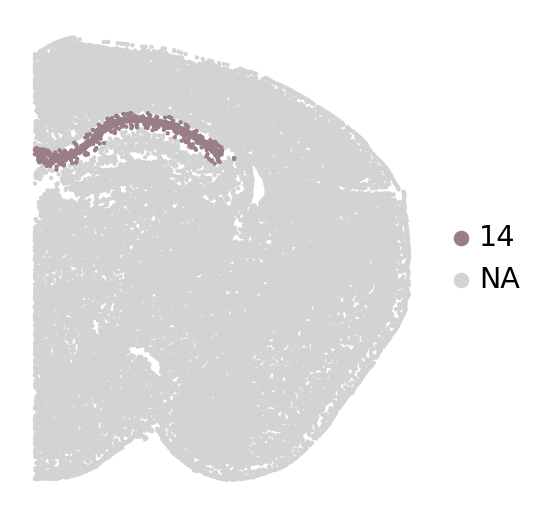

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


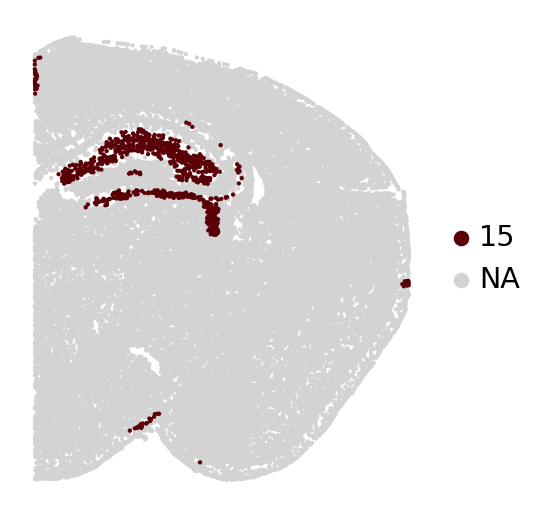

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


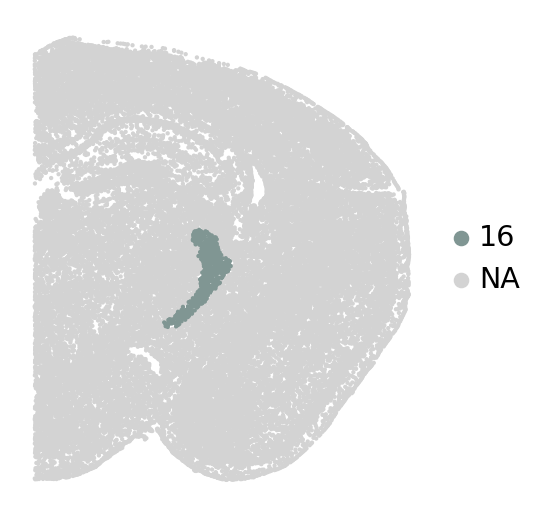

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


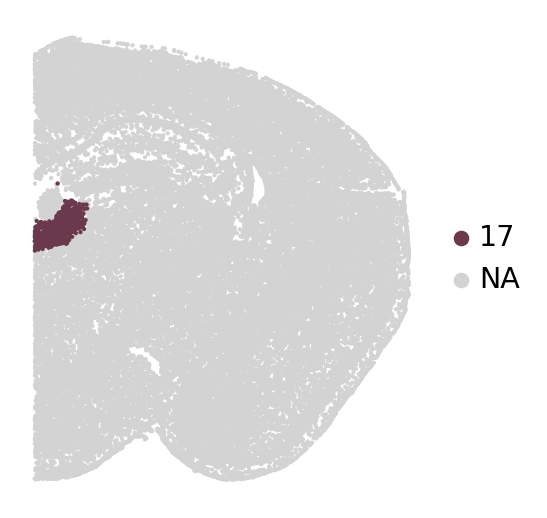

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


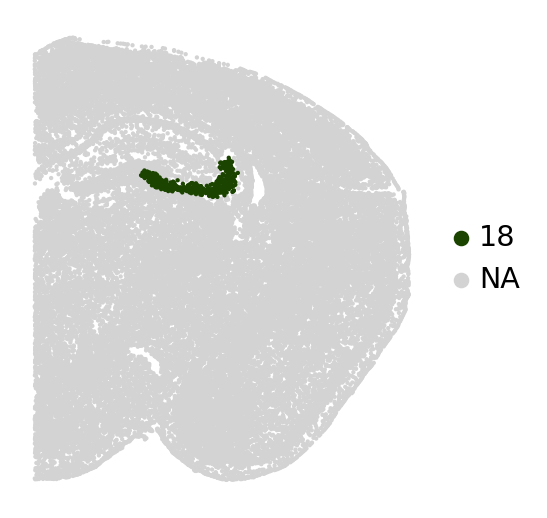

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


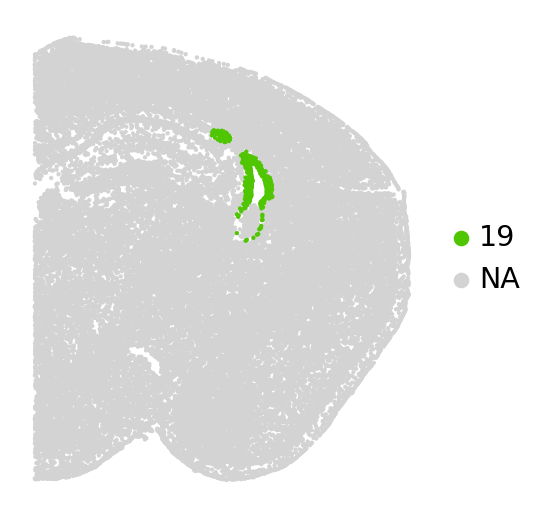

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


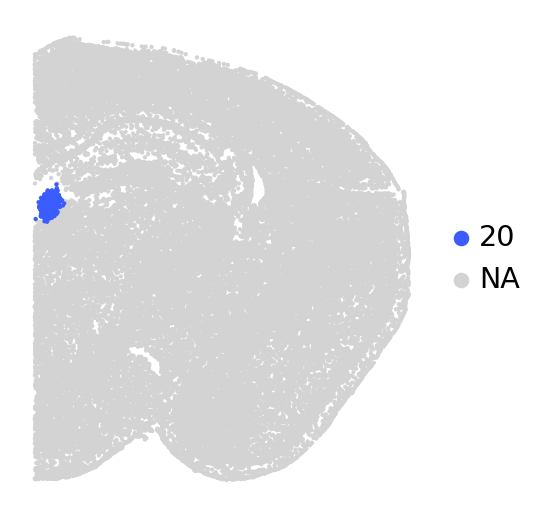

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


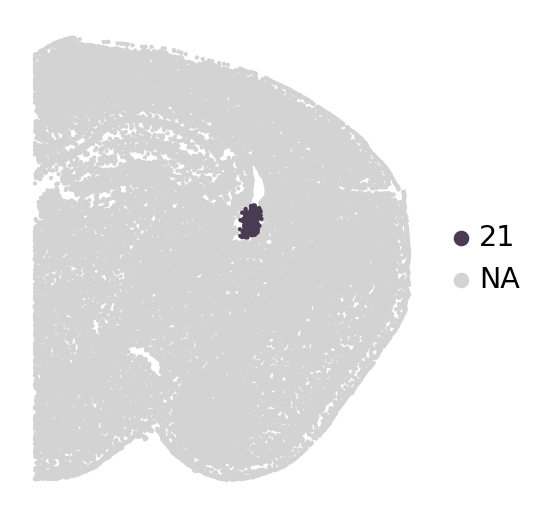

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


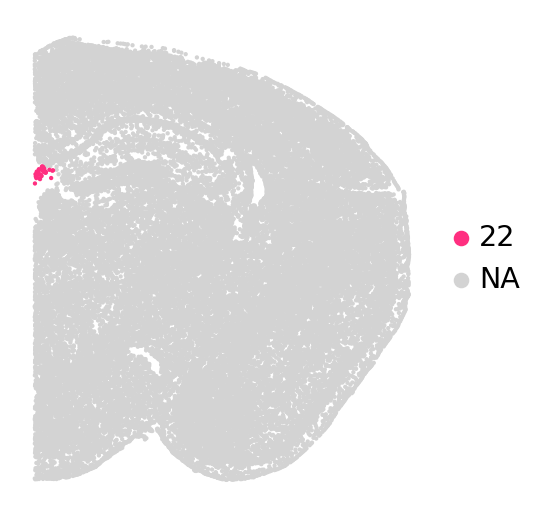

In [25]:
sc.set_figure_params(figsize=(3.3,4))
for i in range(23):
    sc.pl.embedding(adata, basis='spatial', color='leiden', s=15, show=False, title='', groups=str(i))
    plt.axis('off')
    plt.show()

In [50]:
leiden2region = {
    '0': 'TH',
    '1': 'HY',
    '2': 'L6',
    '3': 'MEA/COA',
    '4': 'fiber tract',
    '5': 'L2/3',
    '6': 'L4',
    '7': 'L5',
    '8': 'CP',
    '9': 'BLA',
    '10': 'DG',
    '11': 'meninges/L1',
    '12': 'PIR',
    '13': 'RSP',
    '14': 'CA1',
    '15': 'HPFmo',
    '16': 'RT',
    '17': 'LHb',
    '18': 'CA2/3',
    '19': 'VL',
    '20': 'MHb',
    '21': 'chpl1',
    '22': 'chpl2',
}
adata.obs['region'] = adata.obs['leiden'].map(leiden2region)

In [28]:
olddata = sc.read_h5ad('/stanley/WangLab/kamal/code/remote_notebooks/spatial_autocorrelation/adata_all_techniques.h5ad')
old_regions = olddata.obs['region_smooth_subsampled'].unique()
palette = sc.pl.palettes.default_102
old_cmap = {old_regions[i]:palette[i] for i in range(len(old_regions))}

In [31]:
old_regions = set(old_regions)
new_regions = set(adata.obs['region'].unique())
shared_regions = old_regions.intersection(new_regions)
all_regions = old_regions.union(new_regions)

new_cmap = dict()
for region in shared_regions:
    new_cmap[region] = old_cmap[region]

print(new_regions-shared_regions)
print(old_regions-shared_regions)

set()
set()


In [32]:
# Verify uniqueness of colors
len(new_cmap.values()) == len(set(new_cmap.values()))

True

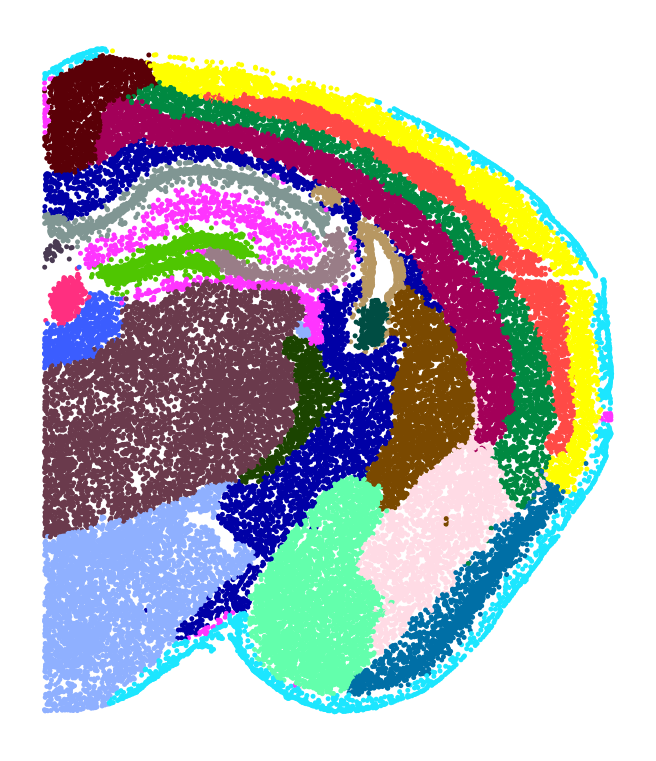

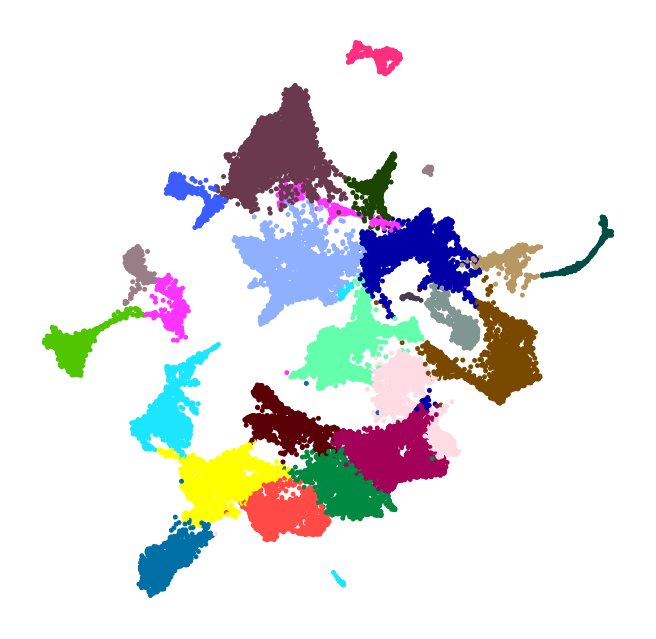

In [51]:
sc.set_figure_params(figsize=(5,6))
sc.pl.embedding(adata, basis='spatial', color='region', s=20, palette=new_cmap, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'tissue_concat_shuffled_leiden.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

sc.set_figure_params(figsize=(5,5))
sc.pl.embedding(adata, basis='X_umap', color='region', s=20, palette=new_cmap, legend_loc=None, return_fig=True, title='')
plt.axis('off')
figname = f'umap_concat_shuffled_leiden.png'
savepath = os.path.join(basepath, figname)
plt.savefig(savepath, bbox_inches='tight', transparent=True, dpi=dpi)

In [52]:
adata.write('/stanley/WangLab/kamal/data/spin_tests/concat_shuffled.h5ad')

# Compare to non shuffled concat

In [37]:
cdata = sc.read_h5ad('/stanley/WangLab/kamal/code/remote_notebooks/spatial_autocorrelation/adata_all_techniques.h5ad')

In [53]:
adata.obs['region_noshuffle'] = cdata.obs['region_concat']

In [54]:
subregion_key = 'region_noshuffle'
catregion_key = 'region'

# Avoid costly remove_unused_categories runs
adata.obs[subregion_key] = adata.obs[subregion_key].astype(str)
adata.obs[catregion_key] = adata.obs[catregion_key].astype(str)

df = adata.obs[[subregion_key, catregion_key]]

subregions = sorted(df[subregion_key].unique())
catregions = sorted(df[catregion_key].unique())

In [55]:
coincidence = []
for subregion in tqdm(subregions):
    subdf = df[df[subregion_key]==subregion]
    aggr = []
    for catregion in catregions:
        aggr.append(len(subdf[subdf[catregion_key]==catregion]))
    coincidence.append(aggr)
matrix = np.stack(coincidence).astype(np.float) # ctype x region
# matrix = matrix.T # region x ctype

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 55.77it/s]
/local/scratch/38836804.1.interactive/ipykernel_186921/2889534764.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.stack(coincidence).astype(np.float) # ctype x region


In [56]:
# Normalize per row (i.e. each row shows proportion of cells in a concatenated region in each subsampled region)
matrix = matrix.copy()
for i in range(len(matrix)):
    matrix[i] = matrix[i] / matrix[i].sum()

/local/scratch/38836804.1.interactive/ipykernel_186921/2977546744.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


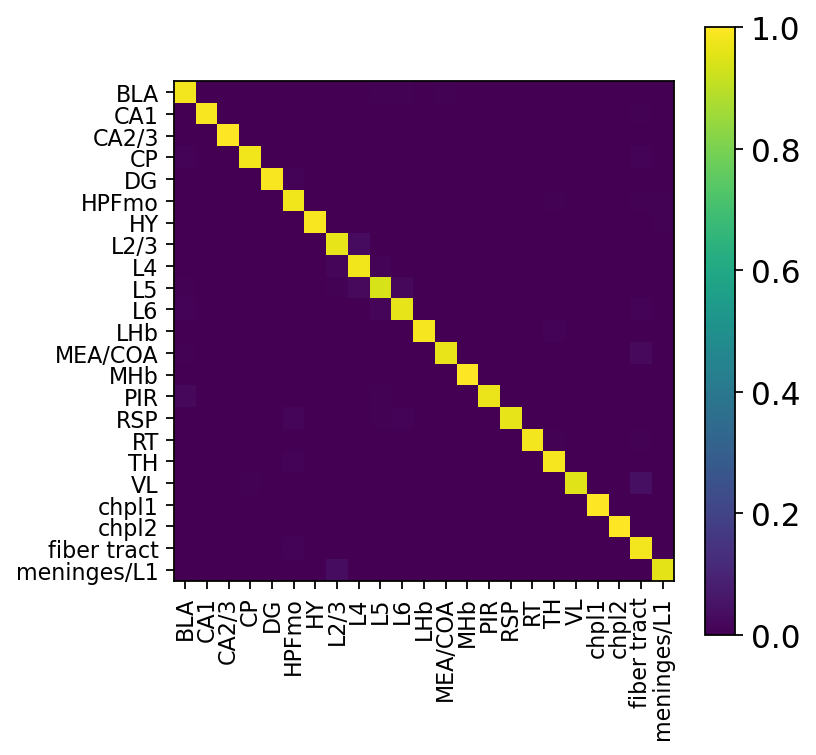

In [60]:
plt.imshow(matrix, cmap='viridis')
plt.xticks([i for i in range(len(subregions))], subregions, rotation=90, fontsize=10)
plt.yticks([i for i in range(len(catregions))], catregions, fontsize=10)
plt.grid()
plt.colorbar()
plt.savefig('/stanley/WangLab/kamal/code/remote_notebooks/spin_tests/figures/cat_shuffle_confusion.png', bbox_inches='tight')
plt.show()

Redo in sub_vs_concat.ipynb to replicate the same dimensions